In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,precision_score
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [31]:
covid_raw_data = pd.read_csv("covid_data.csv")

In [32]:
clean_data = covid_raw_data.iloc[0:97,1:6]

In [34]:
y = clean_data["Confirmed Cases"]

In [35]:
X = clean_data.drop(["Confirmed Cases"],axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [38]:
reg = linear_model.Lasso(alpha=0.1)

In [39]:
reg

Lasso(alpha=0.1)

In [40]:
reg.fit(X_train,y_train)

/Users/davidfesenmaier/.local/share/virtualenvs/project_3-paKtD1_P/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 109994.71682848549, tolerance: 1486.7203057471265



Lasso(alpha=0.1)

In [41]:
y_predict = reg.predict(X_test)

In [42]:
reg.score(X_test,y_test)

0.991183387991757

In [69]:
mean_squared_error(y_test,y_predict, squared=True)

2222.091721683318

In [43]:
print(y_predict)

[   6.50477223   18.76059195 1468.57721317   74.30973528 1232.33327139
  188.80868      54.34428391   31.09223397   48.82250246   15.16150764]


In [44]:
print(y_test)

10       0.0
35       0.0
94    1379.0
12       0.0
90    1174.0
68     206.0
62      86.0
5        0.0
13       0.0
23       0.0
Name: Confirmed Cases, dtype: float64


In [45]:
y_test_mean = y_test.mean()

In [46]:
y_test

10       0.0
35       0.0
94    1379.0
12       0.0
90    1174.0
68     206.0
62      86.0
5        0.0
13       0.0
23       0.0
Name: Confirmed Cases, dtype: float64

In [47]:
y_predict

array([   6.50477223,   18.76059195, 1468.57721317,   74.30973528,
       1232.33327139,  188.80868   ,   54.34428391,   31.09223397,
         48.82250246,   15.16150764])

In [48]:
predict_df = pd.DataFrame({"y_test":y_test,"y_predict":y_predict})

In [49]:
predict_df

,y_test,y_predict
10,0.0,6.504772
35,0.0,18.760592
94,1379.0,1468.577213
12,0.0,74.309735
90,1174.0,1232.333271
68,206.0,188.808680
62,86.0,54.344284
5,0.0,31.092234
13,0.0,48.822502
23,0.0,15.161508


In [50]:
sorted_predict_df=predict_df.sort_index()

In [51]:
sorted_predict_df

,y_test,y_predict
5,0.0,31.092234
10,0.0,6.504772
12,0.0,74.309735
13,0.0,48.822502
23,0.0,15.161508
35,0.0,18.760592
62,86.0,54.344284
68,206.0,188.808680
90,1174.0,1232.333271
94,1379.0,1468.577213


(array([73.,  7.,  4.,  1.,  1.,  3.,  3.,  1.,  2.,  2.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

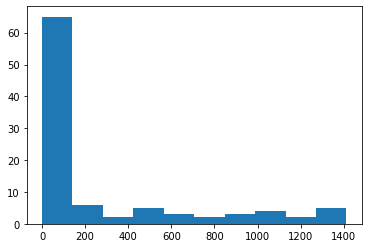

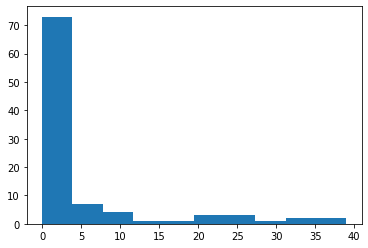

In [57]:
fig, ax = plt.subplots()
ax.hist(clean_data['Confirmed Cases'])

fig, ay = plt.subplots()
ay.hist(clean_data['Deaths'])

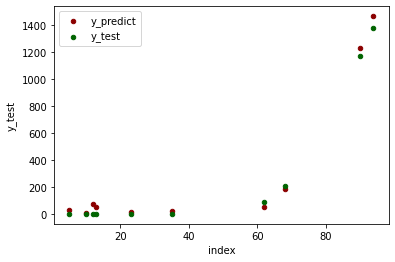

In [70]:
ax = sorted_predict_df.reset_index().plot(kind='scatter', x='index', y='y_predict',color='DarkRed', label='y_predict')
sorted_predict_df.reset_index().plot(kind='scatter', x='index', y='y_test', color='DarkGreen', label='y_test', ax=ax)

In [78]:
df = px.data.sorted_predict_df()
fig = px.scatter(sorted_predict_df, x="index", y="y_test", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

ValueError: Renderer must be specified as a string

In [80]:
sorted_predict_df.to_csv(index=True)

',y_test,y_predict\n5,0.0,31.092233972240322\n10,0.0,6.504772226771593\n12,0.0,74.30973528020033\n13,0.0,48.82250245778328\n23,0.0,15.161507640593982\n35,0.0,18.76059194838723\n62,86.0,54.34428390950704\n68,206.0,188.808679998344\n90,1174.0,1232.3332713871534\n94,1379.0,1468.5772131658189\n'

In [ ]:
df.to_csv(index=False)